In [17]:
#Carga y lectura de los datos en excel
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Clase Base
class Datos:
    def __init__(self, lista):
        self.lista = lista
    def cantidad(self):
        return len(self.lista)
    def mostrar(self):
        return self.lista
    def ordenar(self):
        return sorted(self.lista)

# Clase hija 1:Cualitativa
# Herencia (EstadisticasCat "hereda" todo de Datos)
class EstadisticasCat(Datos):
    def __init__(self, name, data):
        super().__init__(data)
        self.name = name
        self._cat = [str(x) for x in self.lista if pd.notna(x)]

    # 3. POLIMORFISMO (Esta es la "forma" de summary para CUALITATIVAS)
    def frecuencia(self):
        freq = {}
        for valor in self._cat:
            freq[valor] = freq.get(valor, 0) + 1
        return freq

    def porcentaje(self):
        total = len(self._cat)
        freq = self.frecuencia()
        return {k: (v / total) * 100 for k, v in freq.items()}

    def moda(self):
        freq = self.frecuencia()
        max_f = max(freq.values())
        return [k for k, v in freq.items() if v == max_f]

    def summary(self):
        freq = self.frecuencia()
        perc = self.porcentaje()
        resumen = []
        for categoria in freq:
            resumen.append({
                "variable": self.name,
                "categoria": categoria,
                "frecuencia": freq[categoria],
                "porcentaje": round(perc[categoria], 2)
            })
        return pd.DataFrame(resumen)
    
    #Para un gráfico de barras
    def bar_plot(self):
        frecuencias = self.frecuencia()
        
        categorias = list(frecuencias.keys())
        valores = list(frecuencias.values())
        
        # Crear el gráfico de barras
        plt.bar(categorias, valores, color=['#6495ED', '#FFB6C1'])
        plt.title(f'Distribución de Postulantes por {self.name}')
        plt.xlabel(self.name)
        plt.ylabel('Cantidad de Postulantes')
        
        if len(categorias) > 10:
             plt.xticks(rotation=90)
        plt.show()

# 2. HERENCIA (EstadisticasNum también "hereda" de Datos)
# Clase hija 2:Cuantitativa
class EstadisticasNum(Datos):
    def __init__(self, name, data):
        super().__init__(data)
        self.name = name
        serie = pd.to_numeric(pd.Series(self.lista), errors='coerce').dropna().astype(float)
        self._s = serie
        self._num = serie.tolist()

    # Polimorfismo
    def cantidad(self):
        return len(self._s)

    def media(self):
        n = self.cantidad()
        if n == 0:
            return None
        suma = 0
        for valor in self._num:
            suma += valor
        return float(suma / n)

    def mediana(self):
        n = self.cantidad()
        if n == 0:
            return None
        datos_ordenados = sorted(self._num)
        mitad = n // 2
        if n % 2 == 0:
            mediana = (datos_ordenados[mitad - 1] + datos_ordenados[mitad]) / 2
        else:
            mediana = datos_ordenados[mitad]
        return float(mediana)

    def moda(self):
        if not self._num:
            return []
        frecuencias = {}
        for valor in self._num:
            if valor in frecuencias:
                frecuencias[valor] += 1
            else:
                frecuencias[valor] = 1
        max_frec = max(frecuencias.values())
        modas = [valor for valor, freq in frecuencias.items() if freq == max_frec]
        return modas

    def rango(self):
        if self.cantidad() == 0:
            return None
        return float(self._s.max() - self._s.min())

    def _percentil(self, p):
        n = self.cantidad()
        if n == 0:
            return None
        s = sorted(self._num)
        if p <= 0:
            return float(s[0])
        if p >= 100:
            return float(s[-1])
        k = (p / 100.0) * (n - 1)
        f = int(k)
        c = f if k == f else f + 1
        if f == c:
            return float(s[int(k)])
        df = k - f
        return float(s[f] * (1 - df) + s[c] * df)

    def rango_intercuartilico(self):
        q1 = self._percentil(25)
        q3 = self._percentil(75)
        if q1 is None or q3 is None:
            return None
        q1 = float(self._s.quantile(0.25))
        q3 = float(self._s.quantile(0.75))
        return float(q3 - q1)

    def varianza(self):
        n = self.cantidad()
        if n <= 1:
            return None
        media_valor = self.media()
        suma_cuadrados = 0
        for valor in self._num:
            diferencia = valor - media_valor
            suma_cuadrados += diferencia ** 2
        varianza_muestral = suma_cuadrados / (n - 1)
        return float(varianza_muestral)

    def desviacion_estandar(self):
        varianza_muestral = self.varianza()
        if varianza_muestral is None:
            return None
        desviacion = varianza_muestral ** 0.5
        return float(desviacion)

    def summary(self):
        resumen = {
            "variable": self.name,
            "cantidad": self.cantidad(),
            "media": self.media(),
            "mediana": self.mediana(),
            "moda": self.moda(),
            "rango": self.rango(),
            "IQR": self.rango_intercuartilico(),
            "varianza": self.varianza(),
            "stdev": self.desviacion_estandar()
        }
        return pd.DataFrame(resumen)
    
    def box_plot(self):
        plt.boxplot(self._num, vert=False) 
        plt.title(f'Diagrama de Caja para {self.name}')
        plt.xlabel('Valores')
        plt.yticks([]) 
        plt.show()
    def bar_plot(self, bins=10):
        plt.hist(self._num, bins=bins, color='#6495ED', edgecolor='black')
        plt.title(f'Histograma de {self.name}')
        plt.xlabel('Valores')
        plt.ylabel('Frecuencia')
        plt.show()
    # Filtrar valores de las variables categoricas:
    def filtrar_categorica(self, categoria):
        return [x for x in self._cat if x == categoria]
    


print("Clases de POO cargadas en memoria")

Clases de POO cargadas en memoria


In [19]:
# Cargar el archivo de Postulantes
df_postulantes = pd.read_excel("Postulantes.xlsx", skiprows=2)
df_postulantes.head()

,SEXO,EDAD,TIPO DOCUMENTO,PAIS NAC.,DIST. NAC.,PROV. NAC.,DEP. NAC.,TIPO INSTITUCIÓN,GESTIÓN,GESTIÓN2,...,CARRERA INGRESO,ORDEN MERITO,PUNTAJE FINAL,PUNTAJE RM,PUNTAJE RV,PUNTAJE MATEMÁTICAS,PUNTAJE FÍSICA,PUNTAJE QUÍMICA,PUNTAJE BIOLOGÍA,AÑO EGRESO COLEGIO
0,Masculino,18,DNI,Perú,Jesus Maria,Lima,Lima,Colegio,Privada,Privada,...,Ambiental,1,18.06000,18.95238,17.90476,16.000,20.00000,18.42857,17.00000,2016.0
1,Masculino,16,DNI,Perú,Lima,Lima,Lima,Colegio,Privada,Privada,...,Gestión,2,17.38000,18.95238,13.71429,17.375,18.42857,18.42857,18.42857,2017.0
2,Masculino,27,DNI,Perú,Ate,Lima,Lima,Universidad,Privado,Privada,...,Forestal,3,17.00000,17.14286,16.85714,NaN,NaN,NaN,NaN,NaN
3,Femenino,21,DNI,Perú,Lima,Lima,Lima,Universidad,Privado,Privada,...,Biología,4,16.95238,16.00000,17.90476,NaN,NaN,NaN,NaN,NaN
4,Masculino,15,DNI,Perú,La Molina,Lima,Lima,Colegio,Privada,Privada,...,Biología,5,16.52000,17.90476,13.80952,16.000,18.42857,16.85714,16.85714,NaN


  variable  categoria  frecuencia  porcentaje
0     SEXO  Masculino        1436       45.16
1     SEXO   Femenino        1744       54.84


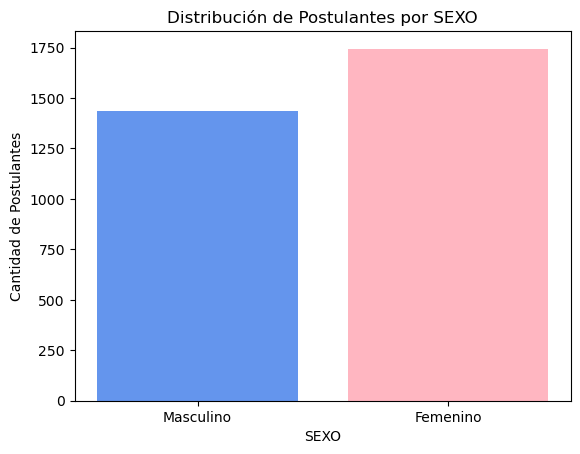

In [20]:
# Prueba Categorica(Sexo)
datos_sexo = df_postulantes["SEXO"].tolist()
analizador_sexo = EstadisticasCat("SEXO", datos_sexo)
print(analizador_sexo.summary())
#Grafico de barras
analizador_sexo.bar_plot()

        variable  cantidad     media  mediana  moda   rango   IQR   varianza  \
0  PUNTAJE FINAL      3180  8.183089      8.0  6.58  17.115  4.94  10.353137   

      stdev  
0  3.217629  


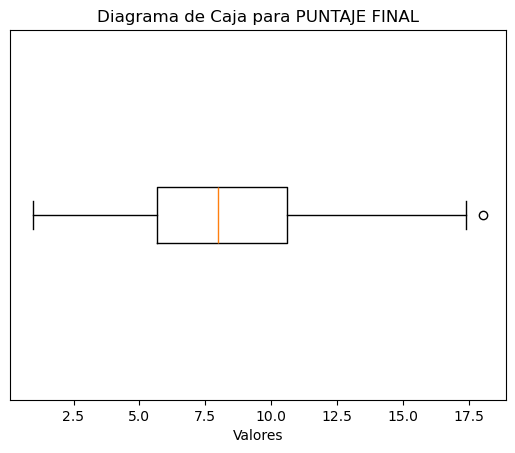

In [21]:
# Prueba Numérica(Puntaje Final)
datos_puntaje = df_postulantes["PUNTAJE FINAL"].tolist()
analizador_puntaje = EstadisticasNum("PUNTAJE FINAL", datos_puntaje)
print(analizador_puntaje.summary())
#Grafico de caja
analizador_puntaje.box_plot()

  variable  cantidad      media  mediana  moda  rango  IQR  varianza     stdev
0     EDAD      3180  18.360692     18.0  17.0   38.0  2.0  5.446771  2.333832


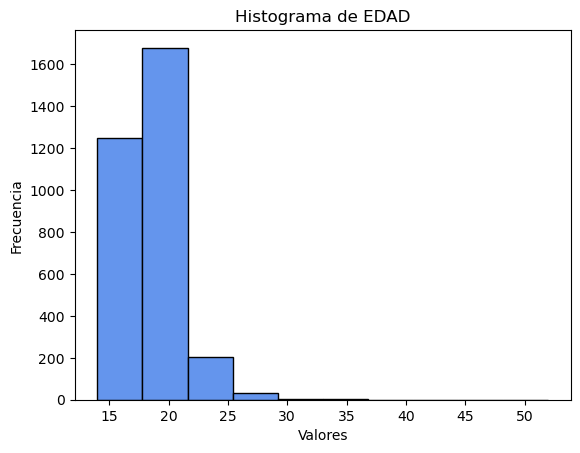

In [22]:
# Prueba Cuantitativa (Edad)
datos_edad = df_postulantes["EDAD"].tolist()
analizador_edad = EstadisticasNum("EDAD", datos_edad)

# Mostrar resumen (opcional)
print(analizador_edad.summary())

# Gráfico de barras
analizador_edad.bar_plot()

In [23]:
# Cargar el archivo de data de estudiantes de la UNALM
df_unalm = pd.read_excel("data_unalm_estudiantes_var.xlsx", skiprows=0)
df_unalm.head()

,Alumno,Carrera,Sexo,Edad,Ciclo,Creditos_aprobados,Promedio,Horas_sueño,Horas_estudio
0,Alumno 1,Zootecnia,Masculino,24,7,133,13.2,7.0,3.8
1,Alumno 2,Ingeniería Agrícola,Femenino,20,3,36,11.3,6.7,1.9
2,Alumno 3,Ingeniería Ambiental,Femenino,25,9,183,13.8,5.6,0.9
3,Alumno 4,Estadística Informática,Masculino,20,7,142,12.8,8.8,3.2
4,Alumno 5,Ingeniería Meteorológica y Gestión de Riesgos ...,Masculino,26,9,194,14.2,6.8,1.8


        variable  cantidad   media  mediana  moda  rango  IQR  varianza  \
0  Horas_estudio       200  3.0005      3.0   2.9    7.0  2.1  2.174924   

      stdev  
0  1.474762  


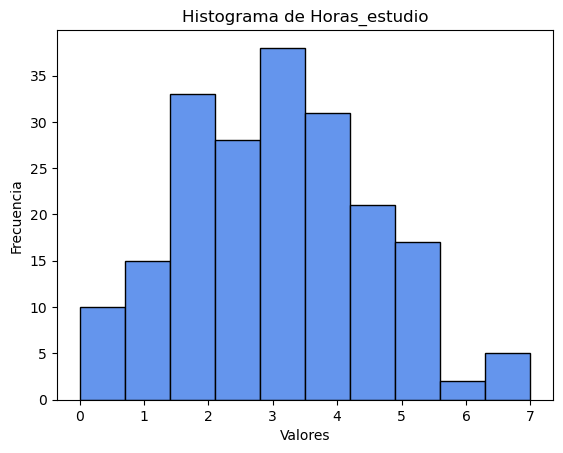

In [24]:
# Prueba Cuantitativa (Horas de estudio)
datos_estudio = df_unalm["Horas_estudio"].tolist()
analizador_estudio = EstadisticasNum("Horas_estudio", datos_sueño)

# Mostrar resumen (opcional)
print(analizador_estudio.summary())

# Gráfico de barras
analizador_estudio.bar_plot()